### Multiple Hypothesis Testing

### Background Set Up
Consider testing N = 1000 hypotheses $H_1,.....,H_N$ , and let $\mathcal{H}_0 \subseteq {1, . . . , N}$ denote the indices of the nulls among them (so that $i \in \mathcal{H}_0$ if index $i$ correspond to a null). Denote by $\pi_0$ the proportion of true null hypotheses, $\pi_0 = \frac{|\mathcal{H}_0|}{N}$. Denote by $P_1, . . . , P_N$ the corresponding p-values. Suppose that the alternative p-values $P_i,i \notin \mathcal{H}_0$ are equal to 0.01 with probability one, and that the null p-values $P_i,i \in \mathcal{H}_0$ are as usual independent and uniformly distributed on [0, 1]. The target FDR or FWER level is $\alpha = 0.05$.

The story can be interpretted as:<br/><br/>
$H_1,H_2,H_3,............H_i..................,H_{998},H_{999},H_{1000}$ and their corresponding p-values $P_i$<br/><br/>
$P_1,P_2,P_3,..............P_i....................,P_{998},P_{999},P_{1000}$<br/><br/>
Among all $H_i$, proportion $\pi_0$ of them are $\in$ $\mathcal{H}_0$, meaning their true null hypothesis and their $P_i$ are i.i.d as $U[0,1]$, <br/><br/>
The rest of them(proportion $1-\pi_0$), are true alternate hypothesis($\notin \mathcal{H_0}$), their $P_i = 0.01$ for sure.

In [2]:
import numpy as np
from statistics import mean 
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.special import comb

#### Problem
There's an argument that FDR is a problem when the proportion of alternatives among the N hypotheses is low.  We'll demonstrate this statement in practice.

### 1. “Classical” uncorrected decision strategy: 
reject $H_i$ if $P_i \leq \alpha$. <br/> We'll now find the resulting FDR in terms of $\pi_0, N, \alpha$.

By our set up we know,
- FDR(False Discovery Rate) = $\mathbb{E}$(False Discovery Proportion), that is, FDR $ = \mathbb{E}(\frac{FP}{TP+FP})$
- $\alpha = 0.05$; 
- FP: $i\in \mathcal{H_0}$, $P_i < \alpha$; --- # of FP $\sim Bin(N\pi_0, \alpha)$
- TP: $i\notin \mathcal{H_0}$, $P_i < \alpha$; --- Always reject, # of TP = $N(1-\pi_0)$ for sure since their $P_i = 0.01$ for sure


Now let the quantity of FP $= x$, then $P(X=x) =$  $N\pi_0 \choose x$ $\alpha ^{x}(1-\alpha)^{N\pi_0 - x}$ .<br/><br/> So, FDP = $\frac{x}{N(1-\pi_0) + x}$ <br/><br/>
Therefore, FDR = $\sum\limits_{x=0}^{N\pi_0} \frac{x}{N(1-\pi_0) + x}$ $N\pi_0 \choose x$ $\alpha ^{x}(1-\alpha)^{N\pi_0 - x}$

2. **We are curious about how's FDR behaving under with various $pi_0$, so let's plot FDR vs $\pi_0$ over <div align = "center"> $ \pi_0 \in \Pi_0: = \{0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9\}$. </div>**

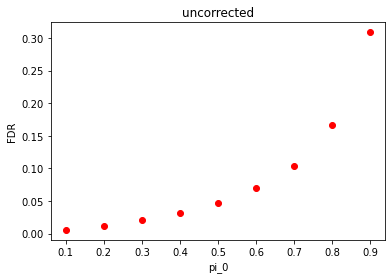

In [4]:
def FDR(pi_0,alpha):
    N = 1000
    avg = 0
    for x in range(int(N*pi_0)):
        avg += x/(N*(1-pi_0)+x) * comb(N*pi_0, x) * alpha**x  * (1-alpha)**(N*pi_0-x)
    return avg

pi_0 = list([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
FDRs = np.zeros(9)
for i in range(9):
    FDRs[i] = FDR(pi_0[i], 0.05)

plt.plot(pi_0, list(FDRs),'ro')
plt.xlabel("pi_0")
plt.ylabel("FDR")
plt.title("uncorrected")
plt.show()

Let's also look at the expected sensitivity of this decision rule:
<div align = "center"> $\mathbb{E}(Sensitivity) = \mathbb{E}(\frac{TP}{TP + FN}) = \mathbb{E}(\frac{N(1-\pi_0)}{N(1-\pi_0)}) = 1$
    </div>  # of FN = 0 since all positives have $P_i = 0.01$ so their's no way to have FN.

### 3.Now consider the Bonferroni correction
Reject if $P_i < \frac{\alpha}{N} = \frac{0.05}{1000}$

By our set up we know,
- FP: $i\in \mathcal{H_0}$, $P_i < \alpha^{'} = \frac{0.05}{1000}$;   # of FP $\sim Bin(N\pi_0, \alpha^{'})$
- TP: $i\notin \mathcal{H_0}$, $P_i < \alpha^{'} = \frac{0.05}{1000}$;  always fail to reject, since $P_i = 0.01$ for 100%, so # of TP = 0.
- FN: All the TP from previous case becomes FN, therefore # of FN = $N(1-\pi_0)$

With Bonferroni Correction: <br/>
<div align = "center"> $\mathbb{E}(Sensitivity) = \mathbb{E}(\frac{TP}{TP + FN}) = \mathbb{E}(\frac{0}{N(1-\pi_0)}) = 0$ </div>

To get the FDR, all procedures are same except the $\alpha = \frac{0.05}{1000}$

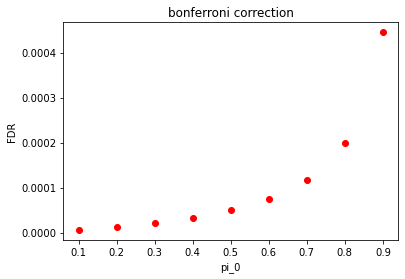

In [6]:
FDRs_bonf = np.zeros(9)
for i in range(9):
    FDRs_bonf[i] = FDR(pi_0[i], 0.05/1000) 
    
plt.plot(pi_0, list(FDRs_bonf),'ro')
plt.xlabel("pi_0")
plt.ylabel("FDR")
plt.title("bonferroni correction")
plt.show()

### short recap
We are testing an extreme case here, but the Sensitivity and FDR trade off can be reflected from the above two cases.<br/>
- **Uncorrected**: Sensitivity = 1, FDR: grow to as large as 0.3 percent when $\pi_0$ is large<br/>
- **Bonferroni Correction**: Sensitivity = 0, FDR: even with large $\pi_0,$ FDR is at around 0.04%. The only way the Sensitivity is recovered is when the $P_i$ of all ground truth positives are dropped below $\frac{0.05}{1000}$, which is too demanding. <br/>
- Neither of the methods above is ideal , since we don't want large FDRs nor 0 sensitivities.

### 4. Benjamini-Hochberg
Benjimini-Hochberg dealt with this trade-off and will find some $\alpha$ in between to mitigate the FDR whereas maintaining the Sensitivities. Let's see its performance.<br/><br/>
Here's its procedures
1. For a given $\alpha$ , find the largest k such that $P_{(k)} \leq \frac{k}{m}\alpha$
2. Reject the null hypothesis (i.e., declare discoveries) for all $H_{(i)}$ for $i = 1,2,...,k$

In [11]:
def benjamini_hochberg(p_values,alpha):
    n = len(p_values)
    p_sorted = np.sort(p_values)
    largest_k = 0
    for j in range(n):
        if p_sorted[j] <= (j+1)*alpha/n:
            largest_k = j
    
    return p_sorted[largest_k]

In [12]:
p_values = [0.01]*100
p_values = p_values + list(np.random.uniform(0,1,900))

alpha = benjamini_hochberg(p_values, 0.05)
print("The alpha value by Benjamini-Hochberg Algorithm:", alpha)

The alpha value by Benjamini-Hochberg Algorithm: 0.0041716806920581995


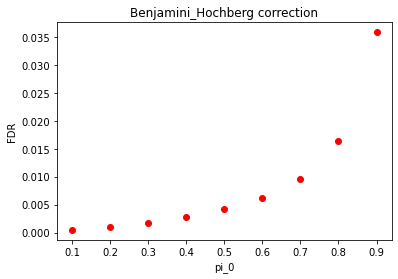

In [14]:
FDRs_BH = np.zeros(9)

for i in range(9):
    FDRs_BH[i] = FDR(pi_0[i], alpha)
    
plt.plot(pi_0, list(FDRs_BH),'ro')
plt.xlabel("pi_0")
plt.ylabel("FDR")
plt.title("Benjamini_Hochberg correction")
plt.show()

### Summary
With Benjiamini-Hochberg, we have an FDR at a reasonable magnitude($\leq 4\%$), the Sensitivity is still 0 since $\alpha_{BH} = 0.00417 < 0.01$, all the positive classes are failed to reject. But this is a very extreme set up to test the FDR and sensitivity of our decision making procedures, and $\alpha_{BH} = 0.00417$ is very close to making to a correct decision and in reality, it should have made a descent amount of correct rejections, and will boost the sensitivity up.